# SAMPLE DATASET

This dataset includes four tables: Customers, Orders, Products, and Order Items. The Customers table contains information about customers, including their name and email address. The Orders table contains information about orders, including the order date and the total amount of the order. The Products table contains information about products, including the product name and price. Finally, the Order Items table contains

In [ ]:
Table 1: Customers

customer_id	name	email
1	Alice	alice@example.com
2	Bob	bob@example.com
3	Charlie	charlie@example.com
4	David	david@example.com
5	Eve	eve@example.com
6	Frank	frank@example.com
7	Gina	gina@example.com
8	Harry	harry@example.com

In [ ]:
Table 2: Orders

order_id	customer_id	order_date	total
1	1	2022-03-10	$23.50
2	1	2022-03-15	$19.99
3	3	2022-03-18	$57.80
4	4	2022-03-20	$32.50
5	5	2022-03-22	$12.99
6	6	2022-03-25	$45.60
7	7	2022-03-28	$21.75
8	8	2022-03-30	$63.40

In [ ]:
Table 3: Products

product_id	product_name	price
1	Widget 1	$5.00
2	Widget 2	$8.99
3	Widget 3	$12.50
4	Widget 4	$19.99
5	Widget 5	$29.99
6	Widget 6	$39.99
7	Widget 7	$49.99
8	Widget 8	$59.99

In [ ]:
Table 4: Order Items

order_id	product_id	quantity
1	2	2
1	4	1
2	3	3
3	1	4
3	5	1
4	7	2
5	2	1
6	6	1
6	7	2
7	1	2
7	3	1
8	4	3
8	8	2

# JOINS

## Inner Join: The most common type of join, where only the matching records between the two tables are returned.

In [ ]:
SELECT *
FROM Orders
INNER JOIN Customers
ON Orders.customer_id = Customers.customer_id;


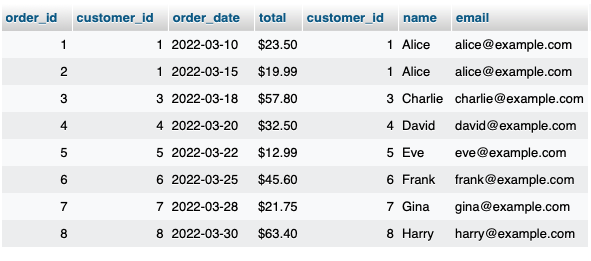

This query will return all orders and customer data where the customer_id in the Orders table matches the customer_id in the Customers table.



## Left Join (or Left Outer Join): Returns all the records from the left table (the one listed first in the statement), and matching records from the right table.

In [ ]:
SELECT *
FROM Customers
LEFT JOIN Orders
ON Customers.customer_id = Orders.customer_id;


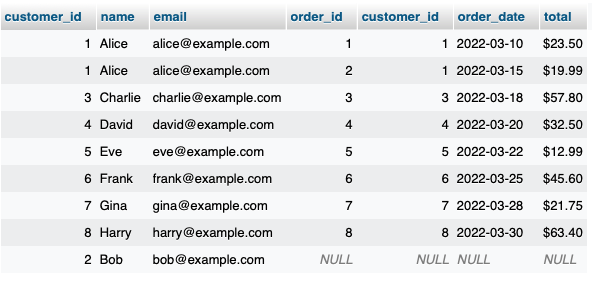

This query will return all customer data and any matching order data where the customer_id in the Customers table matches the customer_id in the Orders table. If there is no matching order data, the order columns will be NULL.



## Right Join (or Right Outer Join): Returns all the records from the right table (the one listed second in the statement), and matching records from the left table.

In [ ]:
SELECT *
FROM Orders
RIGHT JOIN Customers
ON Orders.customer_id = Customers.customer_id;


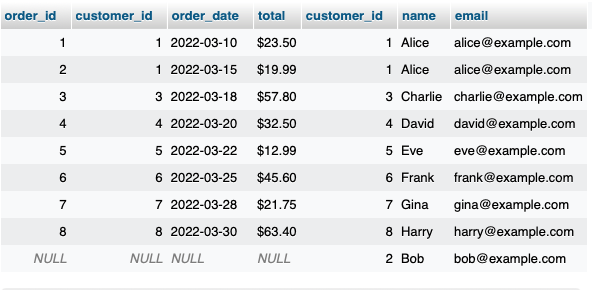

This query will return all order data and any matching customer data where the customer_id in the Orders table matches the customer_id in the Customers table. If there is no matching customer data, the customer columns will be NULL.



## Full Outer Join: Returns all the records from both tables, with NULL values in the columns where there are no matches.

In [ ]:
SELECT *
FROM Customers
LEFT OUTER JOIN Orders
ON Customers.customer_id = Orders.customer_id
UNION
SELECT *
FROM Customers
RIGHT OUTER JOIN Orders
ON Customers.customer_id = Orders.customer_id
WHERE Customers.customer_id IS NULL;


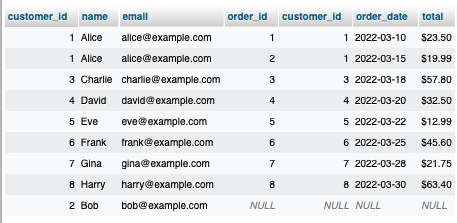

This query will perform a left outer join between Customers and Orders, and then append the rows that did not match the join condition using a right outer join. The WHERE clause filters out any rows where the customer_id from the Customers table is not null, effectively excluding any rows that were already matched in the left outer join.

This should return the same results as a FULL OUTER JOIN would, and should work on MariaDB.

## Cross Join (or Cartesian Product): Returns all possible combinations of the rows from both tables.

In [ ]:
SELECT *
FROM Customers
CROSS JOIN Products;


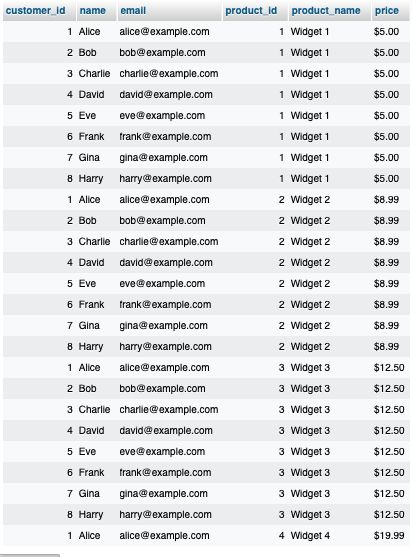

This query will return a Cartesian product of all customer and product data, effectively combining each row in the Customers table with each row in the Products table.

## Self Join: Joins a table to itself using aliases.

In [ ]:
SELECT customer_id, name, name AS referred_by
FROM Customers A
LEFT JOIN Customers B
ON name.referred_by = .customer_id
LIMIT 0, 25;


This query will return all customer data and the name of the customer who referred them. It achieves this by joining the Customers table to itself on the referred_by column.

#There are some additional types of joins in SQL, which are less commonly used but may be useful in specific scenarios:

## Natural Join: Matches columns with the same name in both tables and returns the results.

In [ ]:
SELECT *
FROM Customers
NATURAL JOIN Orders;


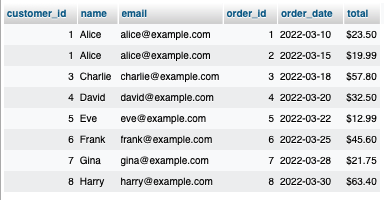

This query will return all customer and order data where the column names match in both tables.

## Cross Apply: Applies a table-valued function to each row of a table.

In [ ]:
SELECT Orders.*, Order_Items.*
FROM Orders
JOIN Order_Items
ON Orders.order_id = Order_Items.order_id;


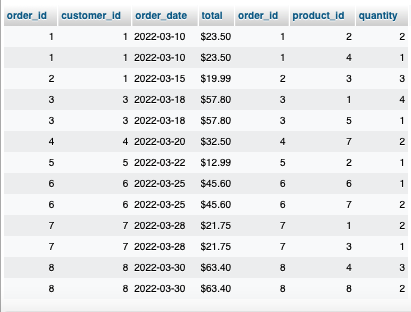

The CROSS APPLY keyword is not supported in MySQL, which is probably the database system you're using. It's a keyword that's specific to Microsoft SQL Server and some other database management systems. Instead, you can use a subquery in the SELECT clause to achieve the same result. Here's an example query that should work in MySQL:

This will give you all columns from both the Orders and Order_Items tables, and will only return rows where there's a matching order_id in both tables.

## Outer Apply: Applies a table-valued function to each row of a table, returning NULL values where there is no match.

In [ ]:
SELECT *
FROM Orders
LEFT JOIN (
    SELECT *
    FROM Order_Items
) AS Items
ON Items.order_id = Orders.order_id;


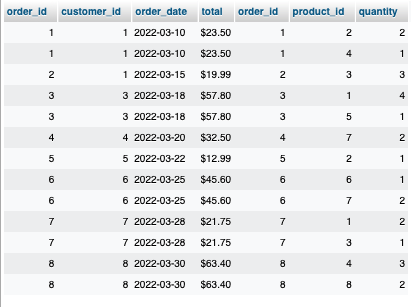

The OUTER APPLY clause is not supported in MySQL/MariaDB. Instead, you can use a LEFT JOIN with a subquery to achieve similar results. Here's an example:

This will join the Orders table with the subquery that selects all columns from the Order_Items table, matching rows based on the order_id column. The LEFT JOIN ensures that all rows from the Orders table are included, even if there is no corresponding row in the Order_Items table.





## Self Outer Join: Joins a table to itself, returning NULL values for non-matching rows.

In [ ]:
SELECT A.customer_id, A.name, B.name AS referred_by
FROM Customers A
LEFT OUTER JOIN Customers B
ON A.referred_by = B.customer_id
OR (A.referred_by IS NULL AND B.customer_id IS NULL);


This query will return all customer data and the name of the customer who referred them. It uses a left outer join to join the Customers table to itself, but includes an OR condition to include rows where both the referred_by and customer_id columns are NULL.